# CCF-C论文实验绘图使用

## 数据准备与加载

In [1]:
import math
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, explained_variance_score, r2_score, mean_squared_error

In [2]:
# 加载训练数据
def load_data(path):
    df = pd.read_csv(path)
    dv = df.values
    X = dv[:, 1:-2]
    Y = dv[:, -2:]
    return X[:, :, np.newaxis], Y

# 测试数据准备
X, y = load_data('./dataset/location_data.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

X02, y02 = load_data('./dataset/location_data02.csv')

## 查看测试数据

In [3]:
X_test.shape

(400, 100, 1)

In [4]:
y_test.shape

(400, 2)

In [5]:
y_test[:10] # 输出前10个的坐标

array([[3.76, 3.77],
       [1.57, 4.63],
       [5.43, 6.77],
       [9.67, 7.94],
       [7.09, 8.28],
       [8.59, 8.24],
       [9.14, 2.22],
       [3.66, 7.91],
       [8.93, 1.86],
       [2.38, 2.02]])

## 导入GRU模型计算指标

In [6]:
# 加载预训练模型
gru = load_model('./models/GRU_2021.h5', compile=False)
gru.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2022-07-23 16:00:34.475581: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-07-23 16:00:34.598728: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f80af9afd70 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-23 16:00:34.598776: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               30900     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 31,102
Trainable params: 31,102
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 加载预tang训练模型
gru2 = load_model('./tang/GRU_2020.h5', compile=False)
gru2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               30600     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 30,802
Trainable params: 30,802
Non-trainable params: 0
_________________________________________________________________


In [8]:
start = time.time()
# 预测测试集计算指标
pxy = gru.predict(X_test.reshape(400, 100, 1))
pxy = np.squeeze(pxy)
print('MAE指标:', mean_absolute_error(y_test, pxy))
print('MSE指标:', mean_squared_error(y_test, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy)))
print('r2指标:', r2_score(y_test, pxy))
print('ev指标:', explained_variance_score(y_test, pxy))
end = time.time()
print('time:', end-start)

MAE指标: 0.2756354026518764
MSE指标: 0.15056168779649812
RMSE指标: 0.3880227928827096
r2指标: 0.9791365169889139
ev指标: 0.9791504839001594
time: 0.3493638038635254


In [9]:
start = time.time()
# 预测测试集计算指标
pxy2 = gru2.predict(X_test.reshape(400, 100, 1))
pxy2 = np.squeeze(pxy2)
print('MAE指标:', mean_absolute_error(y_test, pxy2))
print('MSE指标:', mean_squared_error(y_test, pxy2))
print('RMSE指标:', math.sqrt(mean_squared_error(y_test, pxy2)))
print('r2指标:', r2_score(y_test, pxy2))
print('ev指标:', explained_variance_score(y_test, pxy2))
end = time.time()
print('time:', end-start)

MAE指标: 0.32475206501930953
MSE指标: 0.18922913374174283
RMSE指标: 0.43500475140134137
r2指标: 0.9738508344347644
ev指标: 0.9783432660875703
time: 0.24619412422180176


## 对比坐标绘图

In [10]:
l = y02[:10]
l

array([[2., 2.],
       [2., 5.],
       [3., 8.],
       [4., 1.],
       [4., 6.],
       [5., 3.],
       [6., 9.],
       [7., 5.],
       [8., 2.],
       [9., 8.]])

In [11]:
tmp = []
start = time.time()
# 02数据预测计算指标
pxy = gru.predict(X02.reshape(20, 100, 1))
pxy = np.squeeze(pxy)
tmp.append(pxy)
print('MAE指标:', mean_absolute_error(y02, pxy))
print('MSE指标:', mean_squared_error(y02, pxy))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy)))
print('r2指标:', r2_score(y02, pxy))
print('ev指标:', explained_variance_score(y02, pxy))
end = time.time()
print('time:', end-start)
tmp = np.squeeze(np.array(tmp))[:10]
tmp

MAE指标: 0.18800144487619397
MSE指标: 0.06782031925738358
RMSE指标: 0.2604233462218462
r2指标: 0.9917356228378837
ev指标: 0.9918645924919617
time: 0.014493942260742188


array([[2.1486425, 1.5848514],
       [2.0407417, 4.9888425],
       [2.9635856, 8.085009 ],
       [4.268954 , 0.9797909],
       [3.9710217, 5.8493686],
       [5.3100886, 3.135364 ],
       [6.069646 , 8.577453 ],
       [6.848046 , 5.5250945],
       [7.8021884, 1.5381844],
       [8.969224 , 8.019092 ]], dtype=float32)

In [12]:
tmp2 = []
start = time.time()
# 02数据预测计算指标
pxy2 = gru2.predict(X02.reshape(20, 100, 1))
pxy2 = np.squeeze(pxy2)
tmp2.append(pxy2)
print('MAE指标:', mean_absolute_error(y02, pxy2))
print('MSE指标:', mean_squared_error(y02, pxy2))
print('RMSE指标:', math.sqrt(mean_squared_error(y02, pxy2)))
print('r2指标:', r2_score(y02, pxy2))
print('ev指标:', explained_variance_score(y02, pxy2))
end = time.time()
print('time:', end-start)
tmp2 = np.squeeze(np.array(tmp2))[:10]
tmp2

MAE指标: 0.2949937070012093
MSE指标: 0.1759488987827221
RMSE指标: 0.41946263097291764
r2指标: 0.9786625510933553
ev指标: 0.9856163410951038
time: 0.022744178771972656


array([[2.107601 , 1.8834777],
       [1.9042513, 5.2968225],
       [2.8215513, 8.615716 ],
       [4.148364 , 1.174686 ],
       [3.9786577, 6.1483297],
       [5.138005 , 3.331485 ],
       [6.0643635, 9.213559 ],
       [6.846558 , 6.005748 ],
       [7.9837008, 1.6009866],
       [8.816206 , 8.860764 ]], dtype=float32)

In [13]:
# 预测坐标与实际坐标对比
coor1 = pd.DataFrame(l)
coor1.columns = ['X', 'y']

coor2 = pd.DataFrame(tmp)
coor2.columns = ['PX-EA', 'Py-EA']

coor3 = pd.DataFrame(tmp2)
coor3.columns = ['PX', 'Py']

coor = pd.concat([coor1, coor2, coor3], axis=1)
coor.to_csv('./doc/coordinate_all.csv')
coor

,X,y,PX-EA,Py-EA,PX,Py
0,2.0,2.0,2.148643,1.584851,2.107601,1.883478
1,2.0,5.0,2.040742,4.988842,1.904251,5.296823
2,3.0,8.0,2.963586,8.085009,2.821551,8.615716
3,4.0,1.0,4.268954,0.979791,4.148364,1.174686
4,4.0,6.0,3.971022,5.849369,3.978658,6.148330
5,5.0,3.0,5.310089,3.135364,5.138005,3.331485
6,6.0,9.0,6.069646,8.577453,6.064363,9.213559
7,7.0,5.0,6.848046,5.525095,6.846558,6.005748
8,8.0,2.0,7.802188,1.538184,7.983701,1.600987
9,9.0,8.0,8.969224,8.019092,8.816206,8.860764


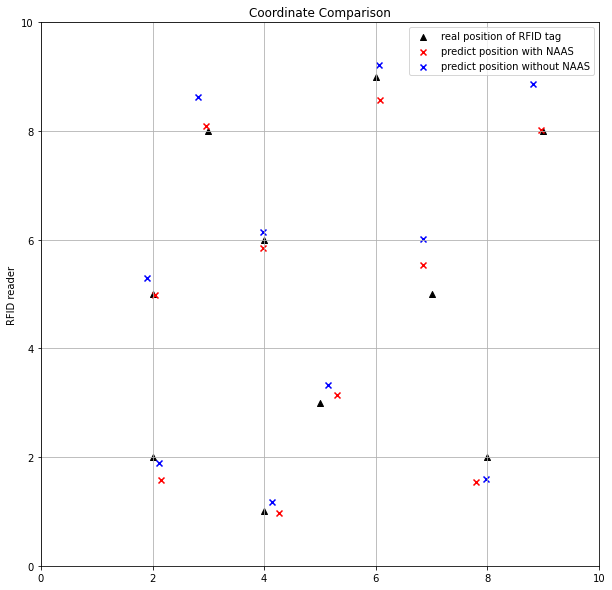

In [14]:
plt.figure(figsize=[10, 10])
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.ylabel('RFID reader')
plt.title('Coordinate Comparison')
# 画图-标准坐标
plt.scatter(l[:, 0], l[:, 1], c='black', marker='^', label='real position of RFID tag')
    
# 画图-预测EA坐标
plt.scatter(tmp[:, 0], tmp[:, 1], c='red', marker='x', label = 'predict position with NAAS')

# 画图-预测无EA坐标
plt.scatter(tmp2[:, 0], tmp2[:, 1], c='blue', marker='x', label = 'predict position without NAAS')

plt.legend()
plt.grid('True')
plt.savefig('./doc/compare_coordinate_all.jpg')